In [4]:
from io import BytesIO
import requests
import pandas as pd
from arcgis.features import FeatureLayer
from arcgis.gis import GIS
from arcgis.mapping import WebMap

In [1]:
from arcgis.gis import GIS
gis = GIS("https://utoronto.maps.arcgis.com",client_id="D6mmWslBBmHA1RuS", verify_cert=False)
print("Successfully logged in as: " + gis.properties.user.username)

Please sign in to your GIS and paste the code that is obtained below.
If a web browser does not automatically open, please navigate to the URL below yourself instead.
Opening web browser to navigate to: https://utoronto.maps.arcgis.com/sharing/rest/oauth2/authorize?response_type=code&client_id=D6mmWslBBmHA1RuS&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&state=vE2eaMNLkAByr9hueAVzbUeHS0rwz3&allow_verification=false
Enter code obtained on signing in using SAML: ········
Successfully logged in as: yangch53_utoronto


<Item title:"Coronavirus COVID-19 (2019-nCoV)" type:Dashboard owner:CSSE_covid19>
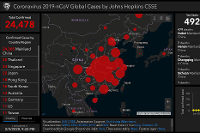

In [2]:
item = gis.content.search("Coronavirus_2019_nCoV_Cases owner:CSSE_covid19", outside_org=True)[0]
item

In [5]:
src_url = "https://services1.arcgis.com/0MSEUqKaxRlEPj5g/arcgis/rest/services/Coronavirus_2019_nCoV_Cases/FeatureServer/1"
fl = FeatureLayer(url=src_url)

In [6]:
df_global = fl.query(where="1=1",
                     return_geometry=True,
                     as_df=True)

In [7]:
df_global

,OBJECTID,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Recovered,Deaths,Active,Admin2,FIPS,Combined_Key,SHAPE
0,1,None,Afghanistan,2022-09-11 05:20:45,33.939110,67.709953,195631,0,7787,0,None,None,Afghanistan,"{""x"": 67.70995300000004, ""y"": 33.9391100000000..."
1,2,None,Albania,2022-09-11 05:20:45,41.153300,20.168300,330948,0,3584,0,None,None,Albania,"{""x"": 20.168300000000045, ""y"": 41.153300000000..."
2,3,None,Algeria,2022-09-11 05:20:45,28.033900,1.659600,270532,0,6879,0,None,None,Algeria,"{""x"": 1.6596000000000686, ""y"": 28.033900000000..."
3,4,None,Andorra,2022-09-11 05:20:45,42.506300,1.521800,46113,0,155,0,None,None,Andorra,"{""x"": 1.5218000000000416, ""y"": 42.506300000000..."
4,5,None,Angola,2022-09-11 05:20:45,-11.202700,17.873900,103131,0,1917,0,None,None,Angola,"{""x"": 17.87390000000005, ""y"": -11.202699999999..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,789,Ohio,US,2022-09-11 05:20:45,40.388783,-82.764915,3096557,0,39576,0,None,39,"Ohio, US","{""x"": -82.76491499999997, ""y"": 40.388783000000..."
789,790,Alabama,US,2022-09-11 05:20:45,32.318200,-86.902300,1504180,0,20239,0,None,01,"Alabama, US","{""x"": -86.90229999999997, ""y"": 32.318200000000..."
790,791,North Carolina,US,2022-09-11 05:20:45,35.630066,-79.806419,3141302,0,26365,0,None,37,"North Carolina, US","{""x"": -79.80641899999995, ""y"": 35.630066000000..."
791,792,District of Columbia,US,2022-09-11 05:20:45,38.897438,-77.026817,166893,0,1382,0,None,11,"District of Columbia, US","{""x"": -77.02681699999994, ""y"": 38.897438000000..."


In [8]:
df_global[~pd.isnull(df_global['Province_State'])].groupby('Country_Region').sum()[['Confirmed', 'Recovered', 'Deaths']]

,Confirmed,Recovered,Deaths
Country_Region,,,
Afghanistan,195631,0,7787
Albania,330948,0,3584
Algeria,270532,0,6879
Andorra,46113,0,155
Angola,103131,0,1917
...,...,...,...
West Bank and Gaza,702591,0,5706
Winter Olympics 2022,535,0,0
Yemen,11932,0,2155


<Item title:"World Country Boundaries 2019" type:Feature Layer Collection owner:esri_dm>
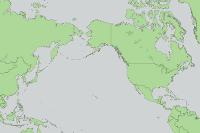

In [9]:
countries_item = gis.content.get('7d721e9b74bf4b16bd43dfe489a5a533')
countries_item

In [11]:
countries_flayer = countries_item.layers[1]
countries_df = countries_flayer.query(as_df=True)
countries_df.columns

Index(['OBJECTID', 'FIPS_CNTRY', 'ISO_2DIGIT', 'ISO_3DIGIT', 'NAME',
       'LONG_NAME', 'LOCSHRTNAM', 'LOCLNGNAM', 'CAPITAL', 'COUNTRYAFF',
       'CONTINENT', 'COLORMAP', 'Shape__Area', 'Shape__Length', 'SHAPE'],
      dtype='object')

In [12]:
countries_df

,OBJECTID,FIPS_CNTRY,ISO_2DIGIT,ISO_3DIGIT,NAME,LONG_NAME,LOCSHRTNAM,LOCLNGNAM,CAPITAL,COUNTRYAFF,CONTINENT,COLORMAP,Shape__Area,Shape__Length,SHAPE
0,1,AQ,AS,ASM,American Samoa,Territory of American Samoa,,,Pago Pago,United States,Oceania,2,0.013720,0.600124,"{""rings"": [[[-170.743900004405, -14.3755549521..."
1,2,WQ,UM,UMI,United States Minor Outlying Islands,,,,,United States,Oceania,7,0.000034,0.028875,"{""rings"": [[[-176.461427013962, 0.215282100954..."
2,3,CW,CK,COK,Cook Islands,Cook Islands,,,Avarua,New Zealand,Oceania,6,0.013073,0.980664,"{""rings"": [[[-159.746981979454, -21.2566730188..."
3,4,FP,PF,PYF,French Polynesia,Overseas Lands of French Polynesia,Polynesie Francaise,Pays d'outre-mer de la Polynesie Francaise,Papeete,France,Oceania,4,0.175332,3.930211,"{""rings"": [[[-149.179199963927, -17.8708359110..."
4,5,WQ,UM,UMI,United States Minor Outlying Islands,,,,,United States,Oceania,7,0.000181,0.053030,"{""rings"": [[[-176.63617309949, 0.7902821691390..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,252,WQ,UM,UMI,United States Minor Outlying Islands,,,,,United States,Oceania,7,0.001576,0.150584,"{""rings"": [[[166.627591264617, 19.324582053940..."
252,253,RS,RU,RUS,Russian Federation,Russian Federation,Rossiya,Rossiyskaya Federatsiya,Moscow,Russian Federation,Asia,1,2929.641772,1526.025072,"{""rings"": [[[131.873291294609, 42.956936010485..."
253,254,RS,RU,RUS,Russian Federation,Russian Federation,Rossiya,Rossiyskaya Federatsiya,Moscow,Russian Federation,Europe,1,1.884414,10.262181,"{""rings"": [[[19.6977731761918, 54.479436078740..."
254,255,SP,ES,ESP,Spain,Kingdom of Spain,Espana,Reino de Espana,Madrid,Spain,Europe,7,52.915449,51.724956,"{""rings"": [[[-2.91471773777289, 35.27360912268..."


In [ ]:
world_merged1 = pd.merge(df_global_sum_c, countries_df[['COUNTRY', 'SHAPE']], 
                         left_index=True, right_on='COUNTRY',
                         how="left")
world_merged1[['COUNTRY', 'Confirmed','Deaths', 'Recovered']].head(10)

In [44]:
map1 = gis.map('Canada', zoomlevel=4)
map1

MapView(layout=Layout(height='400px', width='100%'))

In [45]:
map1.add_layer(fl,   { "type": "FeatureLayer",
                       "renderer":"ClassedSizeRenderer",
                       "field_name":"total_cases"})

In [46]:
ports_fc = gis.content.import_data(world_covid_merged_df[merged_col])
ports_fc

<Item title:"11d2dbbbbb1f4534bb4cb7588fc35309" type:Feature Layer Collection owner:yangch53_utoronto>